# Guide

##### . Choose Kernel `-->` Restart & Run All

# Libraries

In [1]:
!pip install fpgrowth_py

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fpgrowth_py import fpgrowth

# Exploring Data

In [3]:
# read data
df = pd.read_csv('churn.txt', sep=',')

In [4]:
df.shape

(3333, 21)

In [5]:
# Check for any mising value
df.isna().any()

State             False
Account Length    False
Area Code         False
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message     False
Day Mins          False
Day Calls         False
Day Charge        False
Eve Mins          False
Eve Calls         False
Eve Charge        False
Night Mins        False
Night Calls       False
Night Charge      False
Intl Mins         False
Intl Calls        False
Intl Charge       False
CustServ Calls    False
Churn?            False
dtype: bool

In [6]:
# Check for columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [7]:
# Check for distribution of data
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Preprocessing Data

In [8]:
# Drop columns: 'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'
df = df.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge', 'State', 'Area Code', 'Phone'], axis=1)

In [9]:
df

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False.
3329,68,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False.
3330,28,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False.
3331,184,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False.


# FP - Growth

##### a)	Thời gian active của account (account length) có ảnh hưởng đến quyết định rời bỏ (churn) của khách hàng hay không?

In [10]:
x = df['Account Length'].describe()
x # Store to x for later using (below cell)

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account Length, dtype: float64

In [11]:
# Get quartile for binning
mn, _25, _50, _75, mx = x[['min', '25%', '50%', '75%', 'max']]

# Prepare data for binning
temp = df[['Account Length', 'Churn?']]

In [12]:
# Binning to 4 categories prepresent for Q1, Q2, Q3, Q4
very_low = temp.loc[(temp['Account Length'] < _25) & (temp['Account Length'] >= mn)]
low = temp.loc[(temp['Account Length'] < _50) & (temp['Account Length'] >= _25)]
high = temp.loc[(temp['Account Length'] < _75) & (temp['Account Length'] >= _50)]
very_high = temp.loc[(temp['Account Length'] <= mx) & (temp['Account Length'] >= _75)]

In [13]:
# Replace value of account length by class name
very_low.loc[:, ['label']] = 'very_low'
low.loc[:, ['label']] = 'low'
high.loc[:, ['label']] = 'high'
very_high.loc[:, ['label']] = 'very_high'

/home/dangkieu/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
# columns used
cols = ['label', 'Churn?']

##### `Run Model very_low`

In [15]:
itemSetList = very_low[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# itemSetList

[[{'very_low'}, {'False.'}, 0.8690909090909091],
 [{'False.'}, {'very_low'}, 1.0]]

##### `Run Model low`

In [16]:
itemSetList = low[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# itemSetList

[[{'low'}, {'False.'}, 0.8498212157330155], [{'False.'}, {'low'}, 1.0]]

##### `Run Model high`

In [17]:
itemSetList = high[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# itemSetList

[[{'high'}, {'False.'}, 0.844059405940594], [{'False.'}, {'high'}, 1.0]]

##### `Run Model very_high`

In [18]:
itemSetList = very_high[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# itemSetList

[[{'very_high'}, {'False.'}, 0.8571428571428571],
 [{'False.'}, {'very_high'}, 1.0]]

In [19]:
# Display ratio of each Churn value (This cell explained in the report)
ratio = ((df['Churn?'].value_counts() / 3333) * 100)
ratio

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

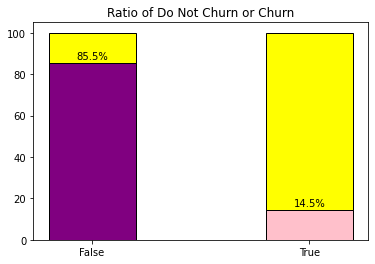

In [20]:
# Visualize above value (This cell explained in the report)
plt.bar(['False', 'True'], [100, 100], width=0.4, color=['yellow', 'yellow'], edgecolor = 'black')
plt.bar(['False', 'True'], ratio, width=0.4, color=['purple', 'pink'], edgecolor = 'black')
plt.rcParams["figure.figsize"] = (3,5)
for i in range(len(ratio)):
    plt.text(i,ratio[i]+3, str(round(ratio[i], 1)) + '%', horizontalalignment='center', verticalalignment='center')
plt.title('Ratio of Do Not Churn or Churn');

In [21]:
# Run on full data minsup = 0.5
itemSetList = pd.concat([high,very_high,low,very_low])[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules

[]

In [22]:
# Run on full data minsup = 0.2
itemSetList = pd.concat([high,very_high,low,very_low])[cols].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.2, minConf=0.5)
rules

[[{'high'}, {'False.'}, 0.844059405940594],
 [{'very_low'}, {'False.'}, 0.8690909090909091],
 [{'low'}, {'False.'}, 0.8498212157330155],
 [{'very_high'}, {'False.'}, 0.8571428571428571]]

######  b)	Liệu việc chọn sử dụng gói Voice Mail có ảnh hưởng đến quyết định chọn sử dụng gói International không và ngược lại?

In [23]:
# Preprocess for ['VMail Plan', "Int'l Plan"] values
k = df[['VMail Plan', "Int'l Plan"]]
k["Int'l Plan"].loc[:] = k["Int'l Plan"].apply(lambda x: 'no I' if x == 'no' else 'yes I')
k["VMail Plan"].loc[:] = k["VMail Plan"].apply(lambda x: 'no V' if x == 'no' else 'yes V')

/home/dangkieu/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [24]:
# Display percent of each couple of variable (This cell explained in the report)
ratio=k.iloc[:].value_counts()/3333
display(ratio)

VMail Plan  Int'l Plan
no V        no I          0.654065
yes V       no I          0.249025
no V        yes I         0.069307
yes V       yes I         0.027603
dtype: float64

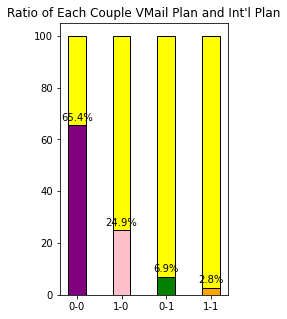

In [25]:
# Visualize above value (This cell explained in the report)
plt.bar(['0-0', '1-0', '0-1', '1-1'], [100., 100., 100., 100.], width=0.4, color=['yellow'], edgecolor = 'black')
plt.bar(['0-0', '1-0', '0-1', '1-1'], ratio*100, width=0.4, color=['purple', 'pink', 'g', 'orange'], edgecolor = 'black')
plt.rcParams["figure.figsize"] = (7,5)
for i in range(len(ratio)):
    plt.text(i,ratio[i]*100+3, str(round(ratio[i]*100, 1)) + '%', horizontalalignment='center', verticalalignment='center')
plt.title("Ratio of Each Couple VMail Plan and Int'l Plan");

In [26]:
# minsup = 0.5
itemSetList = k.to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# freqItemSet

[[{'no I'}, {'no V'}, 0.7242524916943521],
 [{'no V'}, {'no I'}, 0.904189133139776]]

In [27]:
# minsup = 0.2
itemSetList = k.to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.2, minConf=0.5)
rules
# freqItemSet

[[{'yes V'}, {'no I'}, 0.9002169197396963],
 [{'no I'}, {'no V'}, 0.7242524916943521],
 [{'no V'}, {'no I'}, 0.904189133139776]]

#####  c)	Theo như file mô tả thì tác giả có nhấn mạnh về số lượng cuộc gọi customer trong ngày trên 3 thì tỉ lệ khách hàng rời đi sẽ rất cao. Vậy liệu rằng lượng khách hàng rời đi đó họ có sử dụng dịch vụ Voice Mail không? Bởi vì như chúng ta đã biết thì gói Voice Mail hiện đang là gói có tỉ lệ giữ chân khách hàng tốt nhất.


In [28]:
# Get data set of High rate of churn base on custserv_calls
CustServ_Calls_High_Rate_Of_Churn =\
df[['VMail Plan', 'CustServ Calls']].loc[df['CustServ Calls'] >= 4]
CustServ_Calls_High_Rate_Of_Churn.loc[:, 'label'] = 'high_rate_of_churn'
CustServ_Calls_High_Rate_Of_Churn

,VMail Plan,CustServ Calls,label
10,no,4,high_rate_of_churn
14,no,4,high_rate_of_churn
15,no,4,high_rate_of_churn
21,no,5,high_rate_of_churn
48,no,5,high_rate_of_churn
...,...,...,...
3307,no,4,high_rate_of_churn
3309,no,4,high_rate_of_churn
3320,no,4,high_rate_of_churn
3322,no,4,high_rate_of_churn


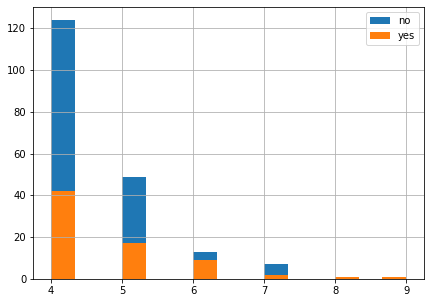

In [29]:
# Display distribution of use or not use VMail plan base on customer service call
CustServ_Calls_High_Rate_Of_Churn.groupby('VMail Plan')['CustServ Calls'].hist(legend=True, bins=15);

In [30]:
# Statistic for the above cell
k = CustServ_Calls_High_Rate_Of_Churn.groupby('VMail Plan')['CustServ Calls']
display(k.value_counts())

VMail Plan  CustServ Calls
no          4                 124
            5                  49
            6                  13
            7                   7
            8                   1
            9                   1
yes         4                  42
            5                  17
            6                   9
            7                   2
            8                   1
            9                   1
Name: CustServ Calls, dtype: int64

In [31]:
itemSetList = CustServ_Calls_High_Rate_Of_Churn[['label', 'VMail Plan']].to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
rules
# freqItemSet

[[{'high_rate_of_churn'}, {'no'}, 0.7303370786516854],
 [{'no'}, {'high_rate_of_churn'}, 1.0]]